# DONE IN TWO WAYS
### Built from scratch
### Built using libraries

# Problem 1

In [1]:
# IMPORTING ALL NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# importing dataset
data=pd.read_csv("Salary_Data.csv");
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# ASSINING VALUES TO IDV AND DV 

In [3]:
temp=data.to_numpy()
X=temp[:,:-1]
y=temp[:,-1]

In [4]:
X # viewing x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [5]:
y # VIEWING Y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

# SPLITTING DATA 

In [6]:
# using liraries 
X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=0.8,test_size=0.2) 
# train_size=0.8 means 80% data is training data 

In [7]:
# from scratch
def SplitDataSet(X,y,p=0.8):
    n,_=X.shape
    train_idxs=random.sample(range(0,n-1),int(np.ceil(p*n)))  # generating random numbers 
    train_idxs=np.sort(train_idxs)
    X_train=X[train_idxs]
    y_train=y[train_idxs]
    test_idxs=[i for i in range(n) if i not in train_idxs]
    X_test=X[test_idxs]
    y_test=y[test_idxs]
    return X_train,y_train,X_test,y_test

X_train,y_train,X_test,y_test=SplitDataSet(X,y) # splitting data set 

In [8]:
print("X_train : {}".format(X_train))
print("y_train : {}".format(y_train))
print("X_test : {}".format(X_test))
print("y_test : {}".format(y_test))
# viewing all the splitted data

X_train : [[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9.5]
 [ 9.6]
 [10.3]]
y_train : [ 39343.  46205.  37731.  43525.  56642.  60150.  54445.  64445.  57189.
  63218.  56957.  57081.  61111.  67938.  66029.  83088.  81363.  93940.
 101302. 113812. 109431. 116969. 112635. 122391.]
X_test : [[ 2.2]
 [ 4. ]
 [ 6.8]
 [ 7.1]
 [ 9. ]
 [10.5]]
y_test : [ 39891.  55794.  91738.  98273. 105582. 121872.]


Text(0, 0.5, 'Salary')

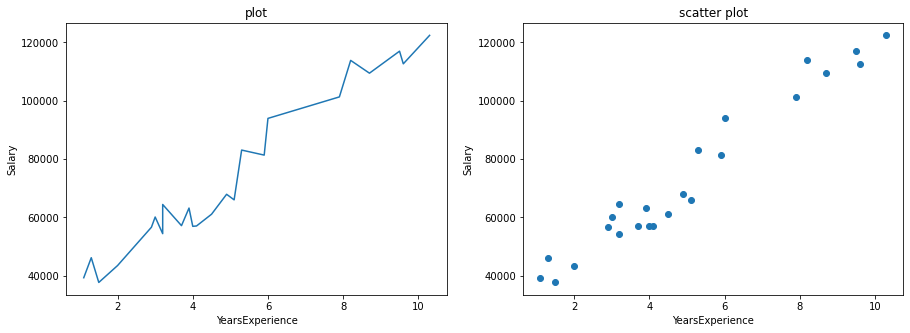

In [9]:
# plotting the data
fig=plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("plot")
plt.plot(X_train,y_train)
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.subplot(1,2,2)
plt.title("scatter plot")
plt.scatter(X_train,y_train)
plt.xlabel("YearsExperience")
plt.ylabel("Salary")

# BUILDING REGRESSION MODEL

slope = [9436.08613496]
intercept = 26520.70337633688


Text(0, 0.5, 'Salary')

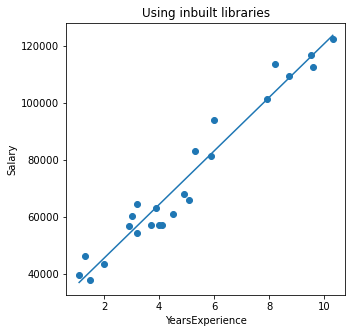

In [10]:
# using inbuilt
reg=LinearRegression()
reg.fit(X_train,y_train)
print("slope = {}".format(reg.coef_))
print("intercept = {}".format(reg.intercept_))
fig=plt.figure(figsize=(5,5))
plt.title("Using inbuilt libraries")
plt.plot(X_train,reg.coef_*X_train+reg.intercept_)
plt.scatter(X_train,y_train)
plt.xlabel("YearsExperience")
plt.ylabel("Salary")

In [11]:
# from sctrach
mu_x=np.mean(X_train)
mu_y=np.mean(y_train)
mu_xx=np.mean(X_train*X_train)
mu_xy=np.mean(X_train.T*y_train)
slope=(mu_xy-mu_x*mu_y)/(mu_xx-mu_x**2)
intercept=mu_y-slope*mu_x

slope = 9436.086134957552
intercept = 26520.70337633689


Text(0, 0.5, 'Salary')

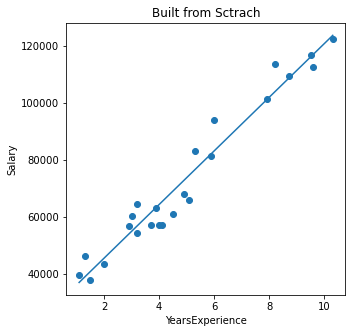

In [12]:
fig=plt.figure(figsize=(5,5))
print("slope = {}".format(slope))
print("intercept = {}".format(intercept))
plt.title("Built from Sctrach")
plt.plot(X_train,slope*X_train+intercept)
plt.scatter(X_train,y_train)
plt.xlabel("YearsExperience")
plt.ylabel("Salary")

In [13]:
print("Regression line : y={}*x+{}".format(slope,intercept))

Regression line : y=9436.086134957552*x+26520.70337633689


# PREDICTING AND PLOTTING TEST DATA

Text(0, 0.5, 'Salary')

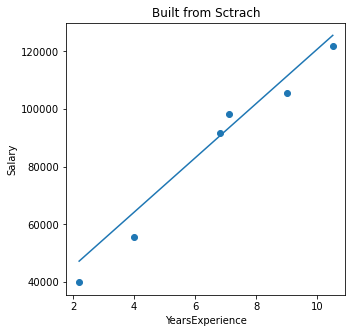

In [14]:
# scratch implementation
y_predict=slope*X_test+intercept
rms_error=np.sqrt(np.mean((y_predict-y_test)**2))  # calculating root mean squred error 
fig=plt.figure(figsize=(5,5))
plt.title("Built from Sctrach")
plt.plot(X_test,y_predict)
plt.scatter(X_test,y_test)
plt.xlabel("YearsExperience")
plt.ylabel("Salary")

In [15]:
print("root mean squared error is {}".format(rms_error))

root mean squared error is 39102.22985303382


Text(0, 0.5, 'Salary')

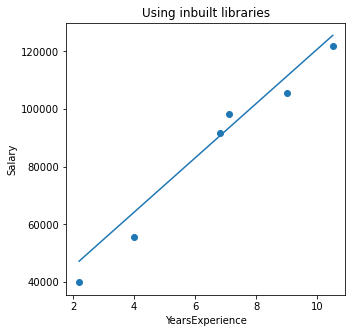

In [16]:
# using sklearn library
fig=plt.figure(figsize=(5,5))
plt.title("Using inbuilt libraries")
plt.plot(X_test,reg.coef_*X_test+reg.intercept_)
plt.scatter(X_test,y_test)
plt.xlabel("YearsExperience")
plt.ylabel("Salary")

# Problem 2

In [259]:
# IMPORTING ALL NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import random 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [226]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [227]:
X=data.iloc[:,:-2].to_numpy()
y=data.iloc[:,-1].to_numpy()
X=np.concatenate((np.ones((X.shape[0],1)),X),axis=1)

# Scaling Dataset

In [228]:
def StandardiseData(arr):
    tag=0
    if(len(arr.shape)==1):
        tag=1
        arr=arr.reshape((arr.shape[0],1))
    n,m=arr.shape
    ans=np.zeros((m,n))
    mean=np.mean(arr,axis=0)
    std=np.std(arr,axis=0)
    for i in range(m):
        if(std[i]==0): 
            ans[i]=arr.T[i]
            continue
        ans[i]=(arr.T[i]-mean[i])/std[i]
    if(tag==1):
        ans=ans.reshape(-1)
    return ans.T

X=StandardiseData(X) # standardising X
y=StandardiseData(y) # Standardising y

# Splitting Dataset

In [229]:
def SplitDataSet(X,y,p=0.8):
    n,_=X.shape
    train_idxs=random.sample(range(0,n-1),int(np.ceil(p*n)))  # generating random numbers 
    train_idxs=np.sort(train_idxs)
    X_train=X[train_idxs]
    y_train=y[train_idxs]
    test_idxs=[i for i in range(n) if i not in train_idxs]
    X_test=X[test_idxs]
    y_test=y[test_idxs]
    return X_train,y_train,X_test,y_test

X_train,y_train,X_test,y_test=SplitDataSet(X,y) # splitting data set 

# Building Model

In [230]:
class MultipleLinearRegression():
    
    def __init__(self):
        pass
    
    def getH(self,theta,X):
        h=X@theta
        h=h.reshape(-1) 
        return h
    
    def getRMSError(self,y_pred,y):
        cost=np.sqrt(np.mean((y_pred-y)**2))
        return cost
    
    def gradient_descent(self,theta,X,y,num_iters,alpha):
        h=self.getH(theta,X)
        for i in range(num_iters):
            n,m=X.shape
            for j in range(m):
                theta[j]=theta[j]-(alpha/n)*np.sum(np.dot((h-y),X.T[j]))
            h=self.getH(theta,X)   
            cost=self.getRMSError(h,y)
            #print("iteration {} cost : {}".format(i,cost))
        return theta
    
    def fit(self,X_train,y_train,theta,num_iters=50,alpha=0.001):
        theta=self.gradient_descent(theta,X_train,y_train,num_iters,alpha)
        return theta
    
    def predict(self,X_test,theta):
        y_pred=self.getH(theta,X_test)
        return y_pred

# Training model

In [231]:
mlr=MultipleLinearRegression()
theta=np.zeros(X_train.shape[1])
theta=mlr.fit(X_train,y_train,theta,100000,0.1)
mlr.getRMSError(mlr.getH(theta,X_train),y_train) # rms error for train data

0.5410772689756278

# Plotting the dataset

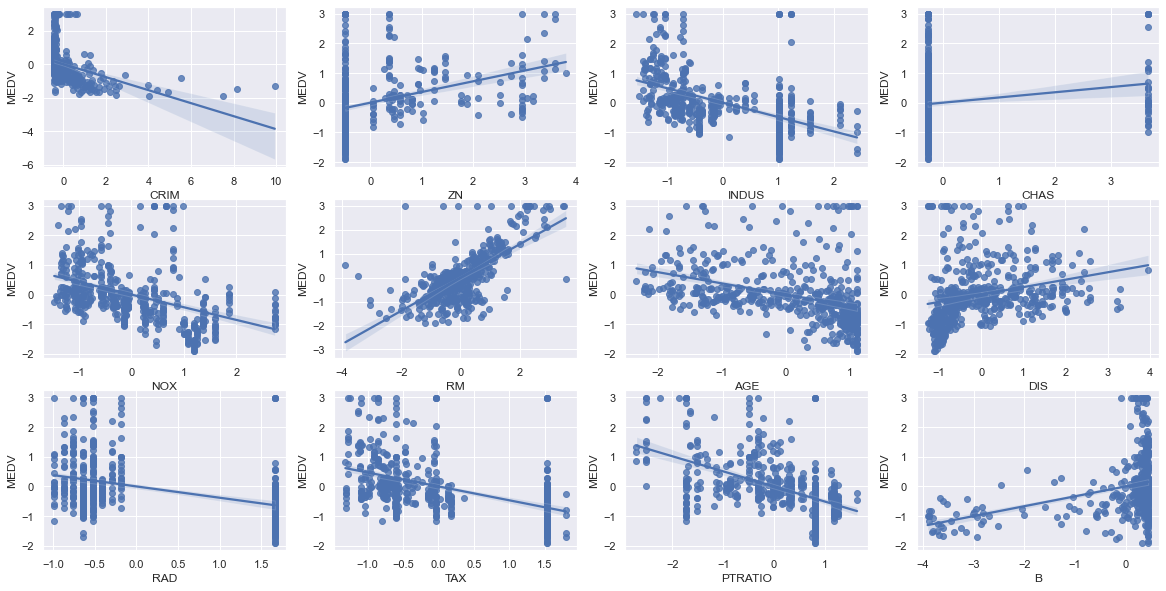

In [301]:
#plotting each column in each subplot
fig,axs=plt.subplots(ncols=4,nrows=3,figsize=(20,10))
l=len(column_names);
for i in range(1,l-1):
    plt.subplot(3,4,i)
    plt.ylabel(column_names[l-1])
    plt.xlabel(column_names[i-1])
    sns.regplot(y=y,x=X.T[i])  # prints regression line for each attribute

# Predicting for test data and Printing RMS Error

In [232]:
y_pred=mlr.predict(X_test,theta)
mlr.getRMSError(y_pred,y_test) # rms error for test data

0.6508890223518364

# Using SKlearn

In [245]:
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [252]:
reg.score(X_train,y_train) # this is not RMS error
# more the score more the model is better

0.7063560772873406

In [253]:
reg.coef_ 

array([ 0.        , -0.12995288,  0.07485596, -0.01788804,  0.09095195,
       -0.26019542,  0.46992665, -0.12183687, -0.31309416,  0.20474997,
       -0.2027225 , -0.25272393,  0.12048524])

In [254]:
reg.intercept_

-0.013354564557615554

In [255]:
# reg.intercept_ + reg.coef_ is theta in our implementation

In [256]:
y_pred=reg.predict(X_test)
mlr.getRMSError(y_pred,y_test)

0.6508890223518365

In [257]:
# you can see using SKlearn also we are getting same RMS error for test dataset

# this results in our implementation from scratch is correct 